In [27]:
%matplotlib notebook

import os
import glob
import math
import sklearn
import pandas as pd
import numpy as np
import itertools
import random

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, normalize
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import EarlyStopping
from IPython.display import SVG

import tensorflow_probability as tfp

import warnings

warnings.filterwarnings('ignore')

from ipywidgets import FloatProgress
from IPython.display import display

fig_width = 12
plt.rcParams["font.size"] = 7

In [28]:
def join_res_data(mycsvdir):
    
    csvfiles = glob.glob(os.path.join(mycsvdir, '*.csv'))
    dataframes = []
    
    for csvfile in csvfiles:
        #print(csvfile)
        df = pd.read_csv(csvfile)
        print(df)
        dataframes.append(df)
    result = pd.concat(dataframes, ignore_index=True)
    
    return result

In [29]:
def get_activity_index(act_dict):
    labels = []
    indices = []
    for k,v in act_dict.items():
        indices.append(k)
        labels.append(v)
    return labels, indices

def plot_confusion_matrix(cm, fig, cm_plt, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    simg = cm_plt.imshow(cm, interpolation='nearest', cmap=cmap)
    cm_plt.set_title(title)
    tick_marks = np.arange(len(classes))
    cm_plt.set_xticks(tick_marks)
    cm_plt.set_yticks(tick_marks)
    cm_plt.set_xticklabels(classes)
    cm_plt.set_yticklabels(classes)
    cm_plt.tick_params(axis='both', which='major', labelsize=10)
    cm_plt.tick_params(axis='both', which='minor', labelsize=8)
    fig.colorbar(simg)
    
    
    plt.setp(cm_plt.get_xticklabels(), rotation=45, horizontalalignment='right')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    cm_plt.set_ylabel('True label')
    cm_plt.set_xlabel('Predicted label')
    #cm_plt.tight_layout()

In [30]:
simclass_df = pd.read_csv(r'G:\JaimeMorales\Codes\omizunagidori\database\labels\O_labels_df.csv')
simclass_d = simclass_df['label'].to_dict()
#del simclass_d[0]
#del simclass_d[4]
target_names,indices = get_activity_index(simclass_d)

In [31]:
simclass_d

{0: 'unlabeled',
 1: 'stationary',
 2: 'flight_take_off',
 3: 'flight_cruising',
 4: 'unknown',
 5: 'bathing',
 6: 'surface_seizing',
 7: 'preening',
 8: 'foraging_dive',
 9: 'body_shaking'}

In [32]:
#simclass_d = {0:jumbi1,1:neji1,2:neji2,3:neji3,4:neji4,5:neji5,6:neji6,7:neji7,8:neji8,9:button,10:haraidashi}

In [33]:
indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\LSTM\3')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\LSTM\4')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\LSTM\5')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\LSTM\6')

In [35]:
#day_res_df = join_res_data(r'C:/Users/Jaime/Documents/JaimeMorales/Codes/HAR_acc/acc2/results/Pure_Unet\3')
#day_res_df = join_res_data(r'C:/Users/Jaime/Documents/JaimeMorales/Codes/HAR_acc/acc2/results/Pure_Unet\4')
#day_res_df = join_res_data(r'C:/Users/Jaime/Documents/JaimeMorales/Codes/HAR_acc/acc2/results/Pure_Unet\5')
#day_res_df = join_res_data(r'C:/Users/Jaime/Documents/JaimeMorales/Codes/HAR_acc/acc2/results/Pure_Unet\6')

In [36]:
day_res_df = join_res_data(r'G:\JaimeMorales\Codes\omizunagidori\database\results\baselines\sec10_att-Unet\all_umi')

           timestamp  l_val  predicted_label  confidence
0      1598047924612      1                1    0.999940
1      1598047924645      1                1    0.999945
2      1598047924677      1                1    0.999974
3      1598047924709      1                1    0.999965
4      1598047924741      1                1    0.999966
...              ...    ...              ...         ...
14138  1598072885353      5                1    0.901676
14139  1598072885387      5                1    0.920191
14140  1598072885419      5                1    0.939395
14141  1598072885451      5                1    0.940064
14142  1598072885483      5                1    0.923881

[14143 rows x 4 columns]
            timestamp  l_val  predicted_label  confidence
0       1598559841516      1                7    0.566488
1       1598559841548      1                7    0.683241
2       1598559841580      1                7    0.790357
3       1598559841612      1                7    0.851786


            timestamp  l_val  predicted_label  confidence
0       1534797124240      3                3    0.999294
1       1534797124280      3                3    0.999403
2       1534797124320      3                3    0.999960
3       1534797124360      3                3    0.999990
4       1534797124400      3                3    0.999999
...               ...    ...              ...         ...
124927  1534810793960      1                1    0.998827
124928  1534810794000      1                1    0.999108
124929  1534810794040      1                1    0.999066
124930  1534810794080      1                1    0.996540
124931  1534810794120      1                1    0.930287

[124932 rows x 4 columns]
           timestamp  l_val  predicted_label  confidence
0      1566421924560      1                1    0.974003
1      1566421924600      1                1    0.978825
2      1566421924640      1                1    0.986034
3      1566421924680      1                1    0

In [37]:
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\Test-17-08\Self-Att-con\3')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\Test-17-08\Self-Att-con\4')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\Test-17-08\Self-Att-con\5')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\Test-17-08\Self-Att-con\6')

In [38]:
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\extra\1_Pure-Unet\3')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\extra\1_Pure-Unet\4')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\extra\1_Pure-Unet\5')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\Testing-6-4\Pure_Unet\3')

In [39]:
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\Test-27-07\LSTM-Att\3')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\Test-27-07\LSTM-Att\4')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\Test-27-07\LSTM-Att\5')
#day_res_df = join_res_data(r'C:\Users\Jaime\Documents\JaimeMorales\Codes\HAR_acc\acc2\results\Test-27-07\LSTM-Att\6')

In [40]:
#day_res_df = pd.read_csv(r'G:\JaimeMorales\Codes\omizunagidori\database\results\baselines\U-Net\O_2022\res_LB02.csv')

In [41]:
day_res_df

,timestamp,l_val,predicted_label,confidence
0,1598047924612,1,1,0.999940
1,1598047924645,1,1,0.999945
2,1598047924677,1,1,0.999974
3,1598047924709,1,1,0.999965
4,1598047924741,1,1,0.999966
...,...,...,...,...
1327139,1598174018257,3,3,1.000000
1327140,1598174018289,3,3,0.999999
1327141,1598174018321,3,3,0.999992
1327142,1598174018353,3,3,0.999992


In [42]:
#day_res_df = day_res_df[day_res_df['l_val']!=4]
#day_res_df = day_res_df[day_res_df['l_val']!=8]

In [43]:
#day_res_df = day_res_df[day_res_df['predicted_label']!=4]
#day_res_df = day_res_df[day_res_df['predicted_label']!=8]

In [44]:
day_res_df[day_res_df['predicted_label']==4]

,timestamp,l_val,predicted_label,confidence


In [45]:
day_res_df[day_res_df['l_val']==4]

,timestamp,l_val,predicted_label,confidence


In [46]:
day_res_df

,timestamp,l_val,predicted_label,confidence
0,1598047924612,1,1,0.999940
1,1598047924645,1,1,0.999945
2,1598047924677,1,1,0.999974
3,1598047924709,1,1,0.999965
4,1598047924741,1,1,0.999966
...,...,...,...,...
1327139,1598174018257,3,3,1.000000
1327140,1598174018289,3,3,0.999999
1327141,1598174018321,3,3,0.999992
1327142,1598174018353,3,3,0.999992


In [47]:
#day_res_df.to_csv(r'G:\JaimeMorales\Codes\MGA-net\datasets\OpenPack\Results\MGA-Net-with-Bi-GRU\U0101_res.csv',index=False)

In [48]:
testYYY = np.array(list(day_res_df['l_val']))
predict1 = np.array(list(day_res_df['predicted_label']))

In [49]:
testYYY.shape

(1327144,)

In [50]:
predict1.shape

(1327144,)

Normalized confusion matrix
                 precision    recall  f1-score   support

      unlabeled       0.00      0.00      0.00         0
     stationary       0.87      0.92      0.90    550396
flight_take_off       0.47      0.60      0.53      7898
flight_cruising       0.96      0.91      0.94    659703
        unknown       0.00      0.00      0.00         0
        bathing       0.56      0.22      0.32     32390
surface_seizing       0.13      0.15      0.14     25685
       preening       0.04      0.07      0.05     23859
  foraging_dive       0.59      0.60      0.60     26974
   body_shaking       0.00      0.00      0.00       239

      micro avg       0.86      0.86      0.86   1327144
      macro avg       0.36      0.35      0.35   1327144
   weighted avg       0.87      0.86      0.86   1327144



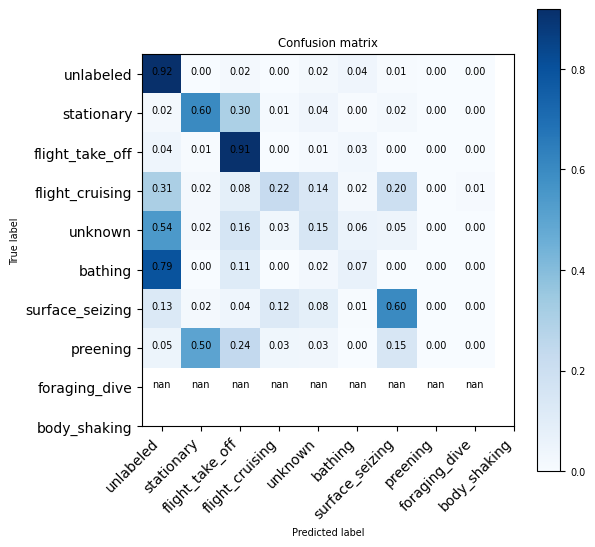

In [51]:
%matplotlib inline
cnf_matrix = confusion_matrix(testYYY, predict1)
fig, (cm_plt1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, fig, cm_plt1, normalize=True, classes=target_names)
fig.show()
result = classification_report(testYYY, predict1, labels=indices, target_names=target_names)
print(result)

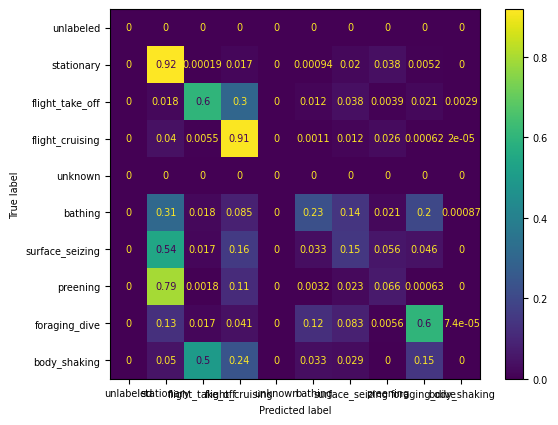

In [52]:
%matplotlib inline
ConfusionMatrixDisplay.from_predictions(testYYY, predict1,labels=indices,normalize='true',display_labels=target_names)
plt.show()  